## Looking at data from susann
### Monthly means, era5 and erai, 2007-2018, 1979-2019
### Sorting in months, look at pattern

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import datetime
import cartopy as ccrs
import matplotlib.dates as mdates
#import func as f

In [2]:
path = '/Users/johannemehren/filer/'
df = xr.open_dataset(path + 'gridfile_test.nc')
df2 = xr.open_dataset(path + 'erai_regrid_5x5.nc')
obs = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')

In [3]:
df_trop = df.sel(lat=slice(-20,20))
df.close()
df2_trop = df2.sel(lat = slice(-20,20), time = slice('2007-01-16T09:00:00.000000000','2018-12-16T09:00:00.000000000')) #, '2017-2-16T09:00:00.000000000' ))
df2.close()

In [4]:
obsr = obs.sel(lat=slice(-20,20))
obs_monmean = obsr.resample(time='M', keep_attrs=True).mean()

In [5]:
era5_mon = df_trop.groupby('time.month').mean(dim='time')
obs_mon = obs_monmean.groupby('time.month').mean(dim='time')
erai_mon = df2_trop.groupby('time.month').mean(dim='time')


/Users/johannemehren/opt/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [6]:
#era5_aw = f.w_average(era5_mon, ['ctpt', 'ctpz'])
#obs_aw = f.w_average(obs_mon, ['CP_T', 'CP_z'])
#erai_aw = f.w_average(erai_mon, ['ctpt', 'ctpz'])
era5_aw = era5_mon.mean(axis=(1,2))
era5_aw['month'] = era5_aw.month
erai_aw = erai_mon.mean(axis=(1,2))
erai_aw['month'] = erai_mon.month
obs_aw = obs_mon.mean(axis=(1,2))
obs_aw['month'] = obs_mon.month

In [11]:
## Colors

col_obs = 'coral'

era5_1 = 'darkblue'
era5_2 = 'cornflowerblue'

erai_1 = 'darkgreen'
erai_2 = 'limegreen'

In [13]:
def getMonthName(month_number):
    testdate=datetime.date(2010,int(month_number),1)
    return testdate.strftime('%b')

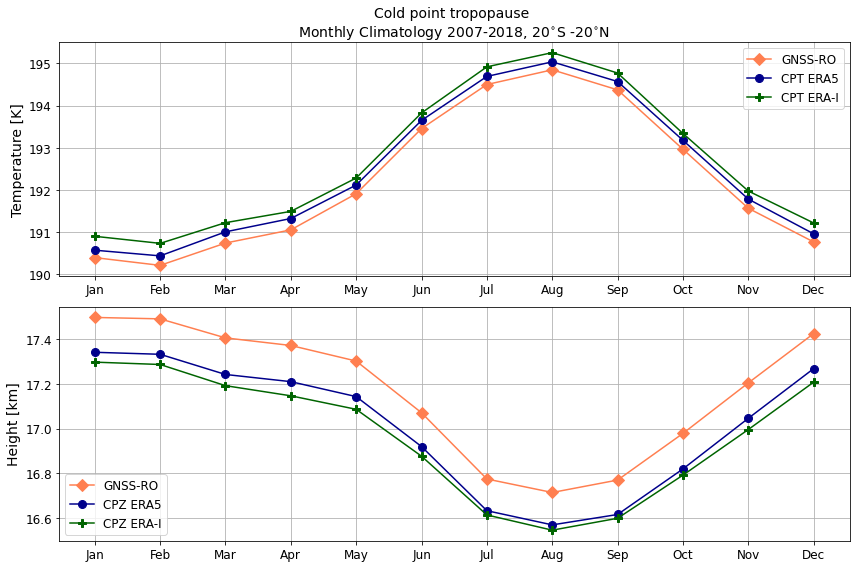

In [45]:
mon = np.linspace(1,12,12, dtype=int)

fig, axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(mon, obs_aw.CP_T, color = col_obs, marker = 'D', ms = 8, label = 'GNSS-RO')
axs[0].plot(mon, era5_aw.ctpt,color = era5_1, marker = 'o', ms = 8,label = "CPT ERA5")
axs[0].plot(mon, erai_aw.ctpt, color = erai_1, marker = 'P', ms = 8, label = 'CPT ERA-I')

axs[0].set_ylabel("Temperature [K]", fontsize=14)
axs[0].set_title('Cold point tropopause \nMonthly Climatology 2007-2018, 20$^{\circ}$S -20$^{\circ}$N', fontsize=14)

axs[1].plot(mon, obs_aw.CP_z,color = col_obs, marker = 'D', ms=8, label = 'GNSS-RO')
axs[1].plot(mon, era5_aw.ctpz, color = era5_1, marker = 'o', ms = 8, label = 'CPZ ERA5')
axs[1].plot(mon, erai_aw.ctpz,color = erai_1, marker='P', ms=8, label = 'CPZ ERA-I')
axs[1].set_ylabel('Height [km]', fontsize=14)

months = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

for ax in axs:
    ax.grid()
    ax.legend(fontsize=12)
    ax.xaxis.set_major_locator(mtick.FixedLocator(mon)) # Set tick locations
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    


plt.tight_layout()
#plt.savefig('fig/cpt_monthly_climatology_2007-2018.png')

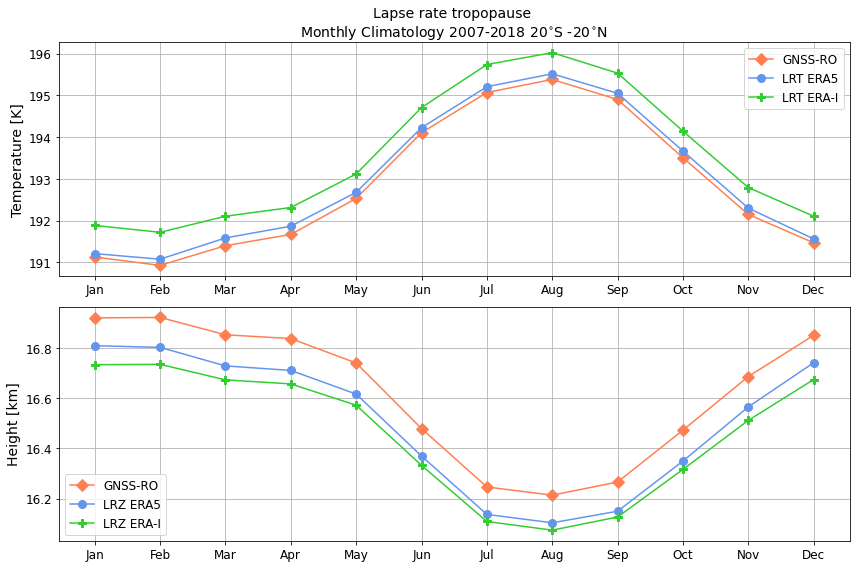

In [43]:
mon = np.linspace(1,12,12, dtype=int)

fig, axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(mon, obs_aw.LR_T,color = col_obs, marker = 'D', ms = 8, label = 'GNSS-RO')
axs[0].plot(mon, era5_aw.tpt, color=era5_2,marker='o', ms = 8,label = "LRT ERA5")
axs[0].plot(mon, erai_aw.tpt, color = erai_2, marker = 'P', ms = 8, label = 'LRT ERA-I')


axs[0].set_ylabel("Temperature [K]", fontsize=14)
axs[0].set_title('Lapse rate tropopause \nMonthly Climatology 2007-2018 20$^{\circ}$S -20$^{\circ}$N', fontsize=14)

axs[1].plot(mon, obs_aw.LR_z,color = col_obs, marker = 'D', ms=8, label = 'GNSS-RO')
axs[1].plot(mon, era5_aw.tpz, color=era5_2,marker='o', ms = 8, label = 'LRZ ERA5')
axs[1].plot(mon, erai_aw.tpz,color = erai_2, marker='P', ms=8, label = 'LRZ ERA-I')
axs[1].set_ylabel('Height [km]', fontsize=14)


for ax in axs:
    ax.grid()
    ax.legend(fontsize=12)
    ax.xaxis.set_major_locator(mtick.FixedLocator(mon)) # Set tick locations
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))
    ax.tick_params(axis='both', which='major', labelsize=12)


plt.tight_layout()
#plt.savefig('fig/lrt_monthly_climatology_2007-2018.png')

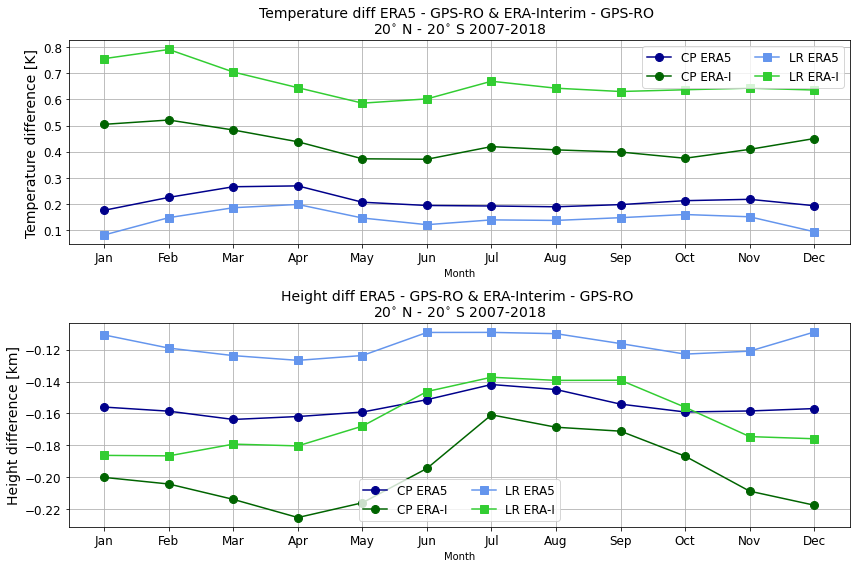

In [40]:
fig, axs = plt.subplots(2,1,figsize=(12, 8))


axs[0].plot(mon, era5_aw.ctpt - obs_aw.CP_T.values,color=era5_1, marker='o', ms = 8,label = 'CP ERA5')
axs[0].plot(mon, erai_aw.ctpt - obs_aw.CP_T.values,color=erai_1,  marker = 'o', ms = 8, label = 'CP ERA-I')
axs[0].plot(mon, era5_aw.tpt - obs_aw.LR_T.values,color=era5_2, marker='s', ms = 8, label = 'LR ERA5')
axs[0].plot(mon, erai_aw.tpt - obs_aw.LR_T.values,color=erai_2, marker ='s',  ms =8, label = 'LR ERA-I')
axs[0].set_ylabel('Temperature difference [K]',fontsize=14)
axs[0].set_title("Temperature diff ERA5 - GPS-RO & ERA-Interim - GPS-RO \n20$^{\circ}$ N - 20$^{\circ}$ S 2007-2018", fontsize=14)

axs[1].plot(mon, era5_aw.ctpz - obs_aw.CP_z.values,color=era5_1, marker='o', ms = 8, label = 'CP ERA5')
axs[1].plot(mon,  erai_aw.ctpz - obs_aw.CP_z.values,color=erai_1, marker = 'o', ms = 8, label = 'CP ERA-I')
axs[1].plot(mon, era5_aw.tpz - obs_aw.LR_z.values, color=era5_2,marker='s', ms = 8, label = 'LR ERA5')
axs[1].plot(mon, erai_aw.tpz - obs_aw.LR_z.values, color=erai_2,marker='s', ms = 8, label = 'LR ERA-I')
axs[1].set_ylabel('Height difference [km]',fontsize=14)
axs[1].set_title("Height diff ERA5 - GPS-RO & ERA-Interim - GPS-RO \n20$^{\circ}$ N - 20$^{\circ}$ S 2007-2018", fontsize=14)

for ax in axs:
    ax.legend(ncol=2, fontsize = 12)
    ax.set(xlabel = 'Month', xticks = mon)
    ax.grid()
    ax.xaxis.set_major_locator(mtick.FixedLocator(mon)) # Set tick locations
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
#plt.savefig('fig/diff_era5_eraI_GNSS_RO_2007-2018_allprop.png')

In [23]:
era5_zonmean = xr.open_dataset('FULL-ERA5.tp.monzonmean.2000-2018.nc4')
erai_zonmean = xr.open_dataset('erai.tp.ctp.monmean.zm.nc')
gpsro = xr.open_dataset('GPS-RO__CP_LR_5x5_2007-2018.nc')

In [112]:
era5_trop = era5_zonmean.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))
era5_mon = era5_trop.groupby('time.month').mean(dim='time')

erai_trop = erai_zonmean.sel(lat=slice(20,-20), time=slice('2007-01-01', '2018-12-31'))
erai_mon = erai_trop.groupby('time.month').mean(dim='time')


gpsro_trop = gpsro.sel(lat=slice(-20,20))
gpsro_mon = gpsro_trop.groupby('time.month').mean(dim='time')
gpsro_zon = gpsro_mon.mean(axis=(2))

gpsro_zon['month'] = gpsro_mon.month
gpsro_zon['lat'] = gpsro_mon.lat

NameError: name 'gpsro_zon' is not defined

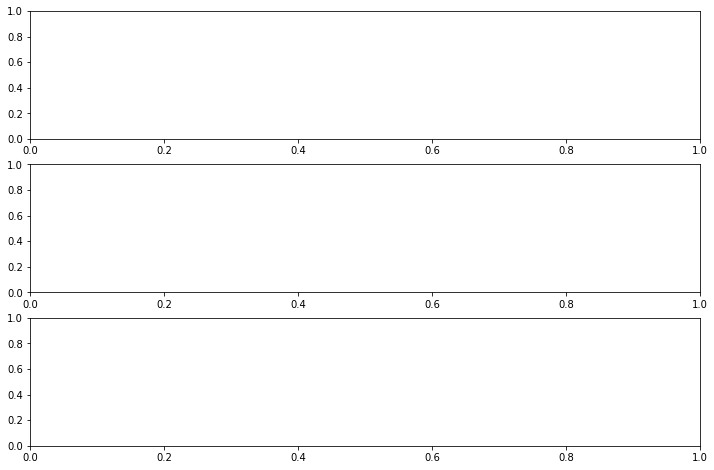

In [24]:
mon=np.linspace(1,12,12)
f, axs = plt.subplots(3,1,figsize=(12,8))


con_0 = gpsro_zon.CP_T.plot.contour(ax=axs[0], x='month', y = 'lat', levels=10)
axs[0].clabel(con_0)

con = era5_mon.ctpt.plot.contour(ax=axs[1], x='month', y='lat', levels=10)
axs[1].clabel(con)

con2 = erai_mon.ctpt.plot.contour(ax=axs[2], x='month', y='lat', levels=10)
axs[2].clabel(con2)

for ax in axs:
    
    ax.set_xticks(mon)
    
plt.tight_layout()

([<matplotlib.axis.XTick at 0x7ff9634ab2e8>,
 <a list of 12 Text xticklabel objects>)

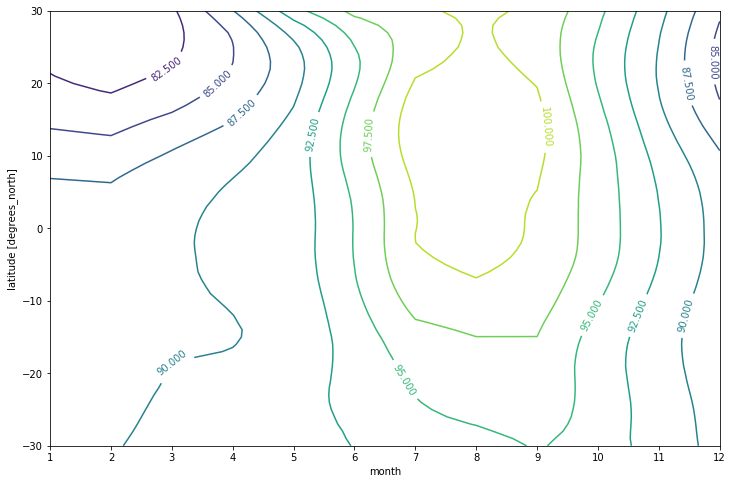

In [72]:
plt.figure(figsize=(12,8))
con = era5_mon.ctpp.plot.contour(x='month', y='lat', levels=10)
plt.clabel(con)
plt.xticks(mon)